# Exercise

It is often said that increase in life expectancy will reduce the amount of children people have as the probability of the child living into adulthood will be higher.

There's two files in `/m/jhnas/jupyter/shareddata/python-r-data-analysis/world-bank-data-1960-to-2016`:
    
    - `fertility_rate.csv` contains fertility rate data.
    - `life_expectancy.csv` constains life expectancy data.

There's one file in `/m/jhnas/jupyter/shareddata/python-r-data-analysis/world-capitals-gps`:

    - `concap.csv` contains GPS locations of world's capitals (and their country codes and continent codes).

Do the following:

1. Read these datasets in and make them into tidy format.

2. Use join-functions from `tidyverse` to join the important variables of these datasets together [[join]](https://dplyr.tidyverse.org/reference/join.html).

3. Calculate mean values and variations of fertility and life expectancy on a global and continental scale.

4. Fit linear model of life expectancy vs. fertility to each country. See which countries match the best and which do the worst.

5. Fit linear model of year vs life expectancy to each country. See which countries have done the most to improve on life expectancy since 1960.

In [1]:
library(tidyverse)
if (!file.exists('rlibs')) {
    dir.create('rlibs')
}
if (!file.exists('rlibs/broom')) {
    install.packages('broom', repos="http://cran.r-project.org", lib='rlibs')
}
library(broom, lib.loc='rlibs')
library(modelr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap




In [2]:
fertility <- read_csv('/m/jhnas/jupyter/shareddata/python-r-data-analysis/world-bank-data-1960-to-2016/fertility_rate.csv') %>%
    gather('1960':'2016', key='year', value='fertility')%>%
    select(-"Indicator Name",-"Indicator Code", -"Country Code") %>%
    rename("country"="Country Name")
head(fertility)

Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)

See spec(...) for full column specifications.



country,year,fertility
<chr>,<chr>,<dbl>
Aruba,1960,4.820000
Afghanistan,1960,7.450000
Angola,1960,7.478000
Albania,1960,6.489000
Andorra,1960,NA
Arab World,1960,6.948747


In [3]:
life_expectancy <- read_csv('/m/jhnas/jupyter/shareddata/python-r-data-analysis/world-bank-data-1960-to-2016/life_expectancy.csv') %>%
    gather('1960':'2016', key='year', value='life_expt')%>%
    select(-"Indicator Name",-"Indicator Code", -"Country Code") %>%
    rename("country"="Country Name")
head(life_expectancy)

Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)

See spec(...) for full column specifications.



country,year,life_expt
<chr>,<chr>,<dbl>
Aruba,1960,65.66200
Afghanistan,1960,32.29200
Angola,1960,33.25100
Albania,1960,62.27900
Andorra,1960,NA
Arab World,1960,46.82506


In [4]:
continents <- read_csv('/m/jhnas/jupyter/shareddata/python-r-data-analysis/world-capitals-gps/concap.csv') %>%
    rename("country"=CountryName) %>%
    rename("continent"=ContinentName) %>%
    select(country, continent)
continents

Parsed with column specification:
cols(
  CountryName = col_character(),
  CapitalName = col_character(),
  CapitalLatitude = col_double(),
  CapitalLongitude = col_double(),
  CountryCode = col_character(),
  ContinentName = col_character()
)



country,continent
<chr>,<chr>
Somaliland,Africa
South Georgia and South Sandwich Islands,Antarctica
French Southern and Antarctic Lands,Antarctica
Palestine,Asia
Aland Islands,Europe
Nauru,Australia
Saint Martin,North America
Tokelau,Australia
Western Sahara,Africa


In [5]:
all_data <- fertility %>%
    left_join(life_expectancy) %>%
    left_join(continents) %>%
    drop_na() %>%
    mutate(year=as.integer(year))

head(all_data)

Joining, by = c("country", "year")

Joining, by = "country"



country,year,fertility,life_expt,continent
<chr>,<int>,<dbl>,<dbl>,<chr>
Aruba,1960,4.820,65.662,North America
Afghanistan,1960,7.450,32.292,Asia
Angola,1960,7.478,33.251,Africa
Albania,1960,6.489,62.279,Europe
United Arab Emirates,1960,6.929,52.265,Asia
Argentina,1960,3.109,65.022,South America


In [6]:
all_data %>%
    summarize_at(vars(life_expt, fertility), list(mean=mean, var=var)) %>%
    arrange(desc(life_expt_mean))

life_expt_mean,fertility_mean,life_expt_var,fertility_var
<dbl>,<dbl>,<dbl>,<dbl>
63.55275,4.088497,135.0696,4.131312


In [7]:
all_data %>%
    group_by(continent) %>%
    summarize_at(vars(life_expt, fertility), list(mean=mean, var=var)) %>%
    arrange(desc(life_expt_mean))

continent,life_expt_mean,fertility_mean,life_expt_var,fertility_var
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Europe,73.05967,2.068358,24.38101,0.6141358
North America,69.00126,3.118051,51.99132,1.9946602
Central America,68.08964,3.892444,64.82568,3.1705508
South America,66.28604,3.744490,53.65130,2.0706504
Australia,66.09577,4.171512,69.48617,2.4062903
Asia,63.76874,4.400579,112.49346,3.5840266
Africa,51.75250,5.919023,83.71514,1.9518703


In [8]:
fertility_model <- function(data) lm(fertility ~ life_expt, data=data)

In [9]:
countries <- all_data %>%
    group_by(continent, country) %>%
    nest()
print(countries)

# A tibble: 178 x 3
   continent     country              data             
   <chr>         <chr>                <list>           
 1 North America Aruba                <tibble [57 × 3]>
 2 Asia          Afghanistan          <tibble [57 × 3]>
 3 Africa        Angola               <tibble [57 × 3]>
 4 Europe        Albania              <tibble [57 × 3]>
 5 Asia          United Arab Emirates <tibble [57 × 3]>
 6 South America Argentina            <tibble [57 × 3]>
 7 Europe        Armenia              <tibble [57 × 3]>
 8 North America Antigua and Barbuda  <tibble [57 × 3]>
 9 Australia     Australia            <tibble [57 × 3]>
10 Europe        Austria              <tibble [57 × 3]>
# … with 168 more rows


In [10]:
countries <- countries %>%
    mutate(
        fert_models=map(data, fertility_model)
    )
print(countries)

# A tibble: 178 x 4
   continent     country              data              fert_models
   <chr>         <chr>                <list>            <list>     
 1 North America Aruba                <tibble [57 × 3]> <lm>       
 2 Asia          Afghanistan          <tibble [57 × 3]> <lm>       
 3 Africa        Angola               <tibble [57 × 3]> <lm>       
 4 Europe        Albania              <tibble [57 × 3]> <lm>       
 5 Asia          United Arab Emirates <tibble [57 × 3]> <lm>       
 6 South America Argentina            <tibble [57 × 3]> <lm>       
 7 Europe        Armenia              <tibble [57 × 3]> <lm>       
 8 North America Antigua and Barbuda  <tibble [57 × 3]> <lm>       
 9 Australia     Australia            <tibble [57 × 3]> <lm>       
10 Europe        Austria              <tibble [57 × 3]> <lm>       
# … with 168 more rows


In [11]:
countries <- countries %>%
    mutate(
        fert_residuals=map2(data, fert_models, add_residuals)
    )

Warning message in predict.lm(model, data):
“prediction from a rank-deficient fit may be misleading”


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



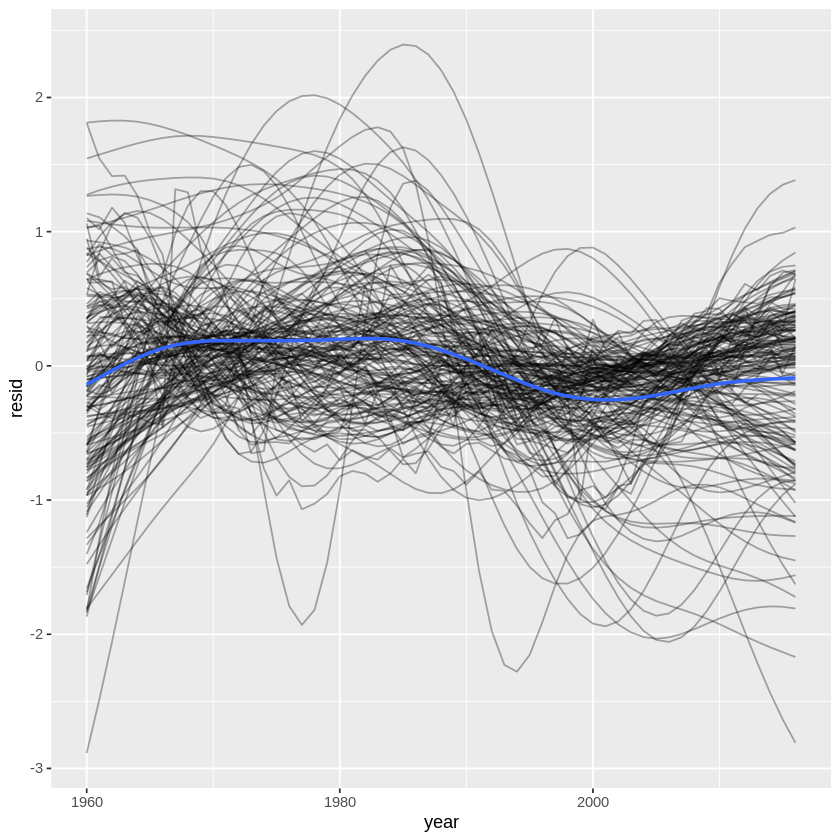

In [12]:
residuals <- unnest(countries, fert_residuals)

residuals %>%
    ggplot(aes(x=year, y=resid)) +
    geom_line(aes(group=country), alpha=1/3) +
    geom_smooth(se = FALSE)

In [13]:
countries <- countries %>%
    mutate(
        fert_stats=map(fert_models, glance)
    )

In [14]:
fert_stats <- unnest(countries, fert_stats, .drop=TRUE)

fert_top5 <- fert_stats %>%
    top_n(5, w=r.squared)

fert_bot5 <- fert_stats %>%
    top_n(-5, w=r.squared)

fert_top5
fert_bot5

continent,country,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
South America,Bolivia,0.9988112,0.9987896,0.0429491,46211.591,3.936876e-82,2,99.55962,-193.11924,-186.99008,0.1014544,55
South America,Ecuador,0.9936257,0.9935098,0.1172346,8573.447,4.497297e-62,2,42.32244,-78.64488,-72.51573,0.7559170,55
South America,Peru,0.9931634,0.9930391,0.1347888,7989.962,3.085214e-61,2,34.36910,-62.73820,-56.60905,0.9992411,55
Australia,Marshall Islands,1.0000000,NaN,NaN,NaN,NaN,2,Inf,-Inf,-Inf,0.0000000,0
Europe,Isle of Man,1.0000000,NaN,NaN,NaN,NaN,2,Inf,-Inf,-Inf,0.0000000,0


continent,country,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Europe,Belarus,0.0122119909,-0.005747791,0.4107027,0.67996321,0.4131614,2,-29.13804,64.27609,70.40524,9.277218,55
Africa,Botswana,0.0109297387,-0.007053357,1.5621936,0.60777849,0.4389674,2,-105.28872,216.57743,222.70659,134.224680,55
Africa,Lesotho,0.0009703964,-0.017193778,1.0008116,0.05342365,0.8180672,2,-79.90778,165.81555,171.94471,55.089317,55
Central America,Greenland,0.0110465404,-0.018040326,0.1775997,0.37977760,0.5418266,2,12.16310,-18.32620,-13.57564,1.072416,34
Europe,San Marino,0.0000000000,0.000000000,NaN,NA,NA,1,Inf,-Inf,-Inf,0.000000,0


In [15]:
countries <- countries %>%
    mutate(
        fert_pred=map2(data, fert_models, add_predictions)
    )

Warning message in predict.lm(model, data):
“prediction from a rank-deficient fit may be misleading”


In [16]:
fert_preds <- unnest(countries, fert_pred, .drop=TRUE)

fert_top5 <- fert_top5 %>%
    left_join(fert_preds) %>%
    drop_na()

fert_bot5 <- fert_bot5 %>%
    left_join(fert_preds) %>%
    drop_na()

Joining, by = c("continent", "country")

Joining, by = c("continent", "country")



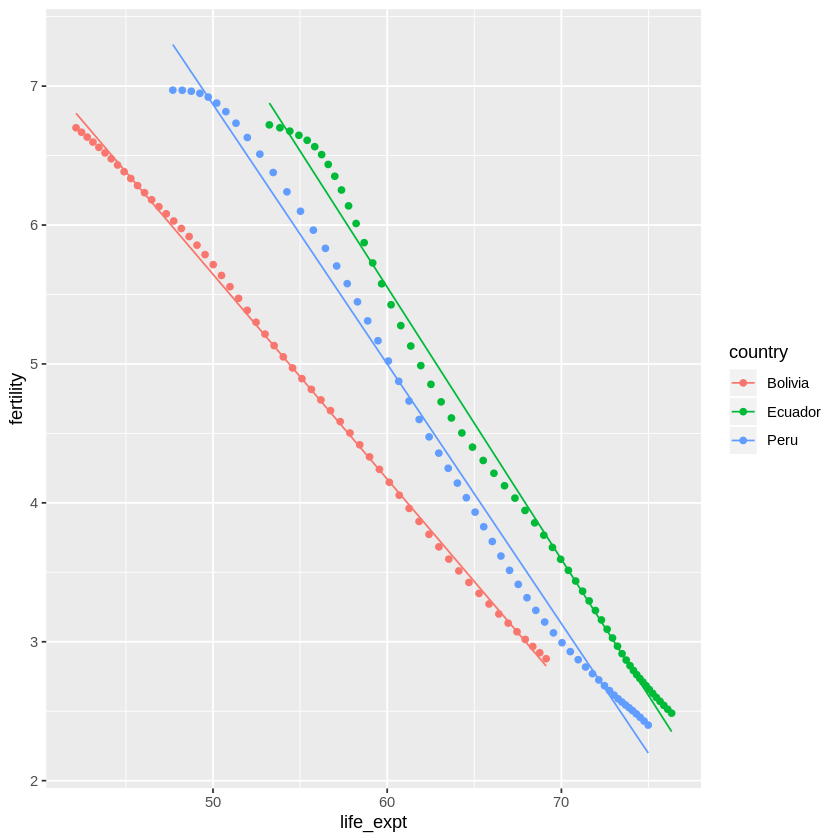

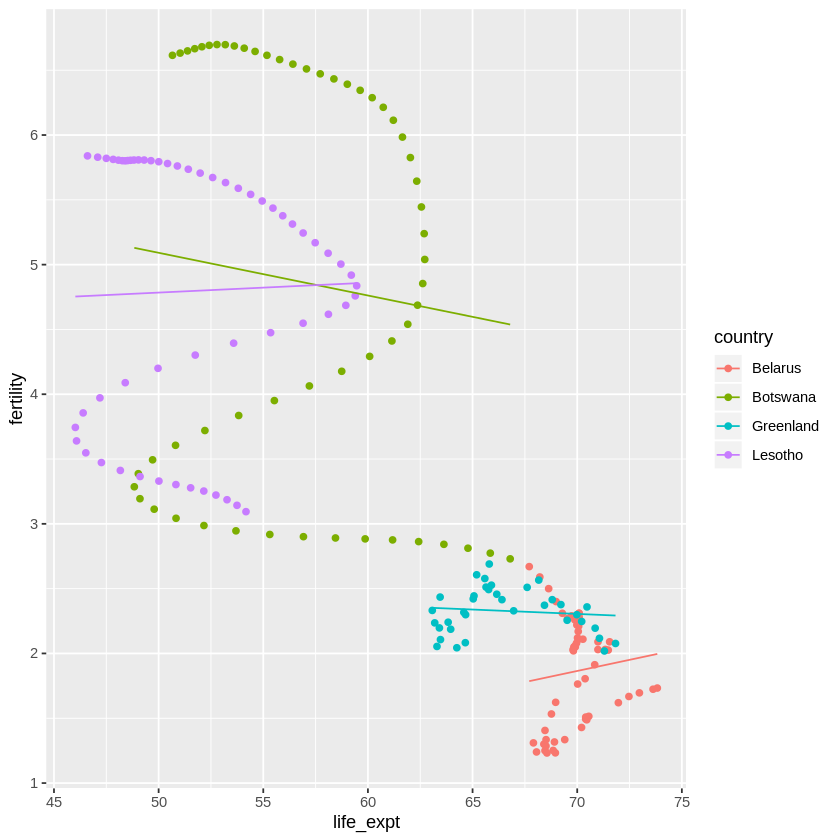

In [17]:
fert_top5 %>%
    ggplot(aes(x=life_expt, y=fertility, color=country)) +
        geom_point() +
        geom_line(aes(y=pred))

fert_bot5 %>%
    ggplot(aes(x=life_expt, y=fertility, color=country)) +
        geom_point() +
        geom_line(aes(y=pred))

In [18]:
lxpt_model <- function(data) lm(life_expt ~ year, data=data)

In [19]:
countries <- countries %>%
    mutate(
        lxpt_models=map(data, lxpt_model),
        lxpt_params=map(lxpt_models, tidy),
        lxpt_pred=map2(data, lxpt_models, add_predictions)
    )
print(countries)

Warning message in predict.lm(model, data):
“prediction from a rank-deficient fit may be misleading”


# A tibble: 178 x 10
   continent country data  fert_models fert_residuals fert_stats fert_pred
   <chr>     <chr>   <lis> <list>      <list>         <list>     <list>   
 1 North Am… Aruba   <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 2 Asia      Afghan… <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 3 Africa    Angola  <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 4 Europe    Albania <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 5 Asia      United… <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 6 South Am… Argent… <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 7 Europe    Armenia <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 8 North Am… Antigu… <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
 9 Australia Austra… <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
10 Europe    Austria <tib… <lm>        <tibble [57 ×… <tibble [… <tibble …
# … with 168 more rows, and 3 more variables: lxpt_models <list>,
#   lxpt_para

In [20]:
lxpt_params <- unnest(countries, lxpt_params, .drop=TRUE)
head(lxpt_params)

lxpt_preds <- unnest(countries, lxpt_pred, .drop=TRUE)

continent,country,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
North America,Aruba,(Intercept),-240.1356273,15.495861904,-15.49676,1.015438e-21
North America,Aruba,year,0.1571152,0.007794432,20.15736,4.531675e-27
Asia,Afghanistan,(Intercept),-1152.6403485,12.040734504,-95.72841,7.282836e-63
Asia,Afghanistan,year,0.6038846,0.006056500,99.70850,7.847913e-64
Africa,Angola,(Intercept),-896.3105057,42.592628328,-21.04379,5.549310e-28
Africa,Angola,year,0.4731381,0.021424130,22.08436,5.143954e-29


In [21]:
lxpt_top5 <- lxpt_params %>%
    filter(term=='year') %>%
    top_n(5,w=estimate)

lxpt_bot5 <- lxpt_params %>%
    filter(term=='year') %>%
    top_n(-5,w=estimate)

In [22]:
lxpt_top5 <- lxpt_top5 %>%
    left_join(lxpt_preds) %>%
    drop_na()

lxpt_bot5 <- lxpt_bot5 %>%
    left_join(lxpt_preds) %>%
    drop_na()

Joining, by = c("continent", "country")

Joining, by = c("continent", "country")



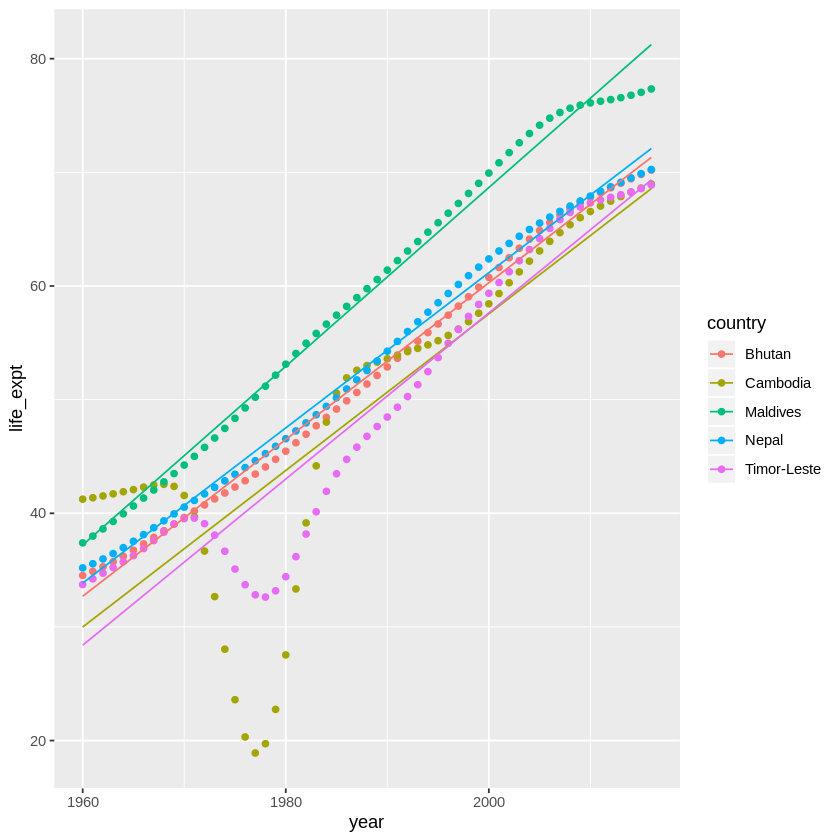

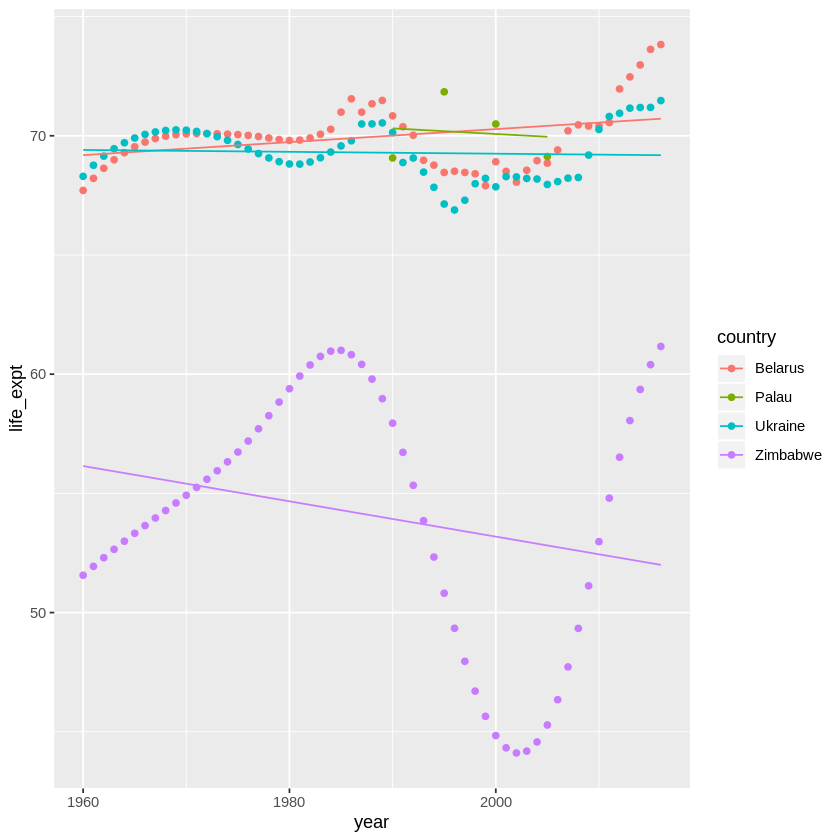

In [23]:
lxpt_top5 %>%
    ggplot(aes(x=year, y=life_expt, color=country)) +
        geom_point() +
        geom_line(aes(y=pred))

lxpt_bot5 %>%
    ggplot(aes(x=year, y=life_expt, color=country)) +
        geom_point() +
        geom_line(aes(y=pred))